Installing the useful libraries

In [227]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

Reading the data from the csv file

In [229]:
!ls
df = pd.read_csv('indian_movie_data.csv', encoding='latin-1')

indian_movie_data.csv  Untitled.ipynb


Exploratory Data Analysis

In [230]:
df['Genre']

0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15504             Action
15505      Action, Drama
15506             Action
15507             Action
15508      Action, Drama
Name: Genre, Length: 15509, dtype: object

Dropping the columns which we don't have to use,and removing the records which have missing(NA) values

In [231]:
df = df.drop("Votes", axis='columns')
column_headers=df.keys()

In [232]:
print(column_headers)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')


In [233]:
df = df.dropna()

In [234]:
len(df)

5659

In [235]:
genres=df['Genre']

In [236]:
genres

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5659, dtype: object

In [237]:
import math

In [238]:
genres

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5659, dtype: object

Extract the genres and index them in a dictionary

In [239]:
genres={}
k=0
string=type('hello')
for genre in df['Genre']:
    if type(genre) == string:
        arr = genre.split(', ')
        print(arr)
        for x in arr:
            if x not in genres.keys():
                genres[x]=k
                k=k+1

['Drama']
['Comedy', 'Romance']
['Comedy', 'Drama', 'Musical']
['Drama', 'Romance', 'War']
['Horror', 'Mystery', 'Thriller']
['Action', 'Crime', 'Thriller']
['Drama']
['Horror']
['Horror', 'Romance', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Drama']
['Comedy', 'Drama', 'Romance']
['Crime', 'Drama', 'Mystery']
['Horror', 'Thriller']
['Comedy', 'Horror']
['Drama', 'Horror', 'Mystery']
['Drama']
['Drama']
['Action', 'Thriller']
['Action']
['Drama']
['Horror', 'Mystery', 'Romance']
['Horror', 'Mystery']
['Drama', 'Horror', 'Romance']
['Horror', 'Mystery', 'Romance']
['Action', 'Drama', 'History']
['Action', 'Drama', 'War']
['Thriller']
['Comedy']
['Adventure', 'Horror', 'Mystery']
['Action', 'Crime', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Action', 'Sci-Fi']
['Crime', 'Mystery', 'Thriller']
['Comedy']
['Thriller']
['Drama', 'History']
['Sport']
['Biography', 'Drama', 'History']
['Drama']
['Horror', 'Romance']
['Comedy', 'Romance']
['Crime', 'Drama']
['Comedy']
['Comedy', 

['Action', 'Crime', 'Drama']
['Drama']
['Action', 'Crime', 'Drama']
['Drama']
['Action', 'Romance']
['Comedy', 'Romance']
['Romance']
['Drama']
['Action', 'Drama']
['Drama']
['Drama', 'Romance']
['Action']
['Action', 'Romance']
['Action']
['Action', 'Drama', 'Music']
['Action']
['Family', 'Drama']
['Drama', 'Family']
['Drama', 'Family']
['Drama', 'Romance', 'Thriller']
['Drama']
['Action', 'Drama', 'Family']
['Crime', 'Drama', 'Musical']
['Comedy', 'Drama']
['Drama']
['Drama', 'Musical', 'Romance']
['Comedy', 'Music', 'Romance']
['Biography', 'Drama', 'History']
['History']
['Drama', 'Romance']
['Comedy', 'Drama']
['Drama']
['Drama', 'Family']
['Comedy', 'Drama', 'Musical']
['Comedy', 'Romance']
['Comedy', 'Drama', 'Romance']
['Comedy']
['Comedy']
['Action', 'Drama']
['Comedy', 'Drama', 'Musical']
['Drama', 'Family']
['Drama']
['Drama', 'Romance']
['Drama']
['Action', 'Drama']
['Drama']
['Drama']
['Drama']
['Comedy', 'Crime', 'Drama']
['Drama', 'Musical', 'Romance']
['Drama', 'Romance'

['Drama', 'Romance']
['Drama', 'Romance']
['Drama', 'Family']
['Action', 'Drama', 'Musical']
['Horror']
['Action', 'Crime', 'Drama']
['Action', 'Sci-Fi', 'Thriller']
['Action', 'Mystery', 'Thriller']
['Drama']
['Mystery']
['Drama', 'Family', 'Romance']
['Comedy', 'Drama', 'Romance']
['Action', 'Drama', 'Musical']
['Comedy', 'Drama', 'Musical']
['Comedy']
['Action', 'Crime', 'Thriller']
['Drama']
['Drama']
['Crime', 'Drama', 'Thriller']
['Action', 'Drama', 'Romance']
['Action', 'Drama', 'Musical']
['Action', 'Family', 'Drama']
['Comedy', 'Drama', 'Romance']
['Drama', 'Romance']
['Comedy', 'Drama', 'Horror']
['Action', 'Adventure', 'Comedy']
['Horror']
['Drama', 'Romance']
['Family', 'Romance']
['Comedy']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Romance']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Drama', 'Romance']
['Drama']
['Musical', 'Drama']
['Drama', 'Family']
['Drama']
['Comedy', 'Drama', 'Romance']
['Drama', 'Romance']
['Action', 'Comedy', 'Drama']
['Drama', 'Romance', 'Thrille

In [240]:
genres

{'Drama': 0,
 'Comedy': 1,
 'Romance': 2,
 'Musical': 3,
 'War': 4,
 'Horror': 5,
 'Mystery': 6,
 'Thriller': 7,
 'Action': 8,
 'Crime': 9,
 'History': 10,
 'Adventure': 11,
 'Sci-Fi': 12,
 'Sport': 13,
 'Biography': 14,
 'Family': 15,
 'Fantasy': 16,
 'Documentary': 17,
 'Music': 18,
 'Animation': 19,
 'News': 20,
 'Western': 21}

In [241]:
df['Director']

1          Gaurav Bakshi
3             Ovais Khan
5           Rahul Rawail
6         Shoojit Sircar
8          Allyson Patel
              ...       
15493        Mozez Singh
15494      Shyam Benegal
15503    S.P. Muthuraman
15505         Kuku Kohli
15508       K.C. Bokadia
Name: Director, Length: 5659, dtype: object

In [242]:
directors={}

k=0
for director in df['Director']:
    if type(director) == string:
        if director not in directors.keys():
            directors[director]=k
            k=k+1

In [243]:
print(directors)

{'Gaurav Bakshi': 0, 'Ovais Khan': 1, 'Rahul Rawail': 2, 'Shoojit Sircar': 3, 'Allyson Patel': 4, 'Biju Bhaskar Nair': 5, 'Madhu Ambat': 6, 'Arshad Siddiqui': 7, 'Partho Ghosh': 8, 'Rabi Kinagi': 9, 'Umesh Shukla': 10, 'Sharat Katariya': 11, 'Pramod Chakravorty': 12, 'Ram Gopal Varma': 13, 'Seshu Kmr': 14, 'Vikram K. Kumar': 15, 'Aparna Sen': 16, 'Vicky Ranawat': 17, 'Mani Shankar': 18, 'Mohibul Haque': 19, 'Sridhar Reddy': 20, 'Vikram Bhatt': 21, 'Dharmendra Suresh Desai': 22, 'Bhushan Patel': 23, 'Vidhu Vinod Chopra': 24, 'Amrit Sagar': 25, 'Aziz Zee': 26, 'Prashant Gore': 27, 'Harish Sharma': 28, 'Sunil Tiwari': 29, 'Abhishek Varman': 30, 'S. Shankar': 31, 'Raj N. Sippy': 32, 'Jaideep Chopra': 33, 'Shivam Tiwari': 34, 'Jayoo Patwardhan': 35, 'Mitali Ghoshal': 36, 'Guddu Dhanoa': 37, 'Awtar Krishna Kaul': 38, 'Vishal Mahadkar': 39, 'Ajai Sinha': 40, 'Nagesh Kukunoor': 41, 'Ankush Bhatt': 42, 'Rajkumar Hirani': 43, 'Arjun Mukerjee': 44, 'Divakar Ghodake': 45, 'Shivaji Lotan Patil': 46

In [244]:
labels=['Actor 1','Actor 2','Actor 3']
actors={}
k=0
for label in labels:
    for actor in df[label]:
        if type(actor)==string:
            if actor not in actors.keys():
                actors[actor]=k
                k=k+1

In [245]:
len(actors)

5041

In [246]:
len(df)

5659

Converting the data availible into usable form

In [247]:
import re

duration=[]

for time in df['Duration']:
    minutes = re.sub('[^0-9]','', time)
    print(minutes)
    duration.append(int(minutes))

109
110
147
142
82
116
96
120
161
166
102
87
132
105
116
146
116
168
158
126
94
138
120
124
144
157
136
107
113
80
122
149
148
149
130
124
121
126
188
115
103
114
115
122
170
100
99
109
140
122
128
93
102
125
145
121
75
113
111
134
110
104
92
136
126
115
100
137
127
120
130
122
115
119
124
135
128
90
105
145
110
150
103
151
109
145
95
127
140
112
143
104
104
177
121
117
148
158
123
120
144
170
72
105
132
107
154
157
115
175
153
142
168
158
78
138
145
148
138
139
133
170
180
137
138
151
78
117
153
150
135
149
150
116
144
46
164
153
147
170
128
123
157
128
132
137
162
137
121
164
148
149
120
171
126
153
160
138
139
144
115
116
177
152
107
150
99
163
143
130
177
149
160
138
133
144
136
145
94
170
165
154
150
141
140
119
145
153
115
122
128
180
145
148
145
125
180
164
129
146
156
157
175
171
123
120
150
160
115
136
152
132
109
146
132
105
240
145
172
88
150
161
132
113
155
167
139
155
107
100
153
107
146
128
111
170
125
147
128
133
78
125
129
106
127
193
137
160
136
140
127
135
141
122
140

131
121
134
148
168
151
152
141
110
148
167
199
84
119
135
127
119
154
112
123
130
90
127
139
121
150
116
132
162
116
119
125
150
128
119
157
167
119
174
190
140
121
147
74
130
101
100
123
127
96
160
122
79
171
130
136
158
106
134
103
125
223
156
128
157
124
103
51
171
92
152
174
139
90
130
97
168
120
157
157
141
162
138
160
113
116
158
153
130
141
172
151
117
126
117
210
87
127
130
97
135
145
132
82
131
126
193
133
91
160
169
167
158
140
155
155
132
161
120
90
115
100
152
126
146
135
127
160
139
111
142
171
146
132
142
133
84
100
142
137
160
149
143
153
143
137
129
90
171
119
142
123
122
140
124
123
146
117
151
173
153
135
150
142
102
141
124
128
165
171
140
137
125
85
125
140
100
145
166
187
142
140
159
159
110
130
65
180
156
130
117
124
96
144
141
159
154
152
187
92
105
143
65
140
120
177
143
169
104
171
116
125
112
164
186
150
107
109
128
150
137
134
137
86
133
161
129
165
121
143
98
155
120
142
145
172
124
136
131
160
165
169
87
122
155
147
130
126
189
117
125
106
148
117
140
161


In [248]:
duration

[109,
 110,
 147,
 142,
 82,
 116,
 96,
 120,
 161,
 166,
 102,
 87,
 132,
 105,
 116,
 146,
 116,
 168,
 158,
 126,
 94,
 138,
 120,
 124,
 144,
 157,
 136,
 107,
 113,
 80,
 122,
 149,
 148,
 149,
 130,
 124,
 121,
 126,
 188,
 115,
 103,
 114,
 115,
 122,
 170,
 100,
 99,
 109,
 140,
 122,
 128,
 93,
 102,
 125,
 145,
 121,
 75,
 113,
 111,
 134,
 110,
 104,
 92,
 136,
 126,
 115,
 100,
 137,
 127,
 120,
 130,
 122,
 115,
 119,
 124,
 135,
 128,
 90,
 105,
 145,
 110,
 150,
 103,
 151,
 109,
 145,
 95,
 127,
 140,
 112,
 143,
 104,
 104,
 177,
 121,
 117,
 148,
 158,
 123,
 120,
 144,
 170,
 72,
 105,
 132,
 107,
 154,
 157,
 115,
 175,
 153,
 142,
 168,
 158,
 78,
 138,
 145,
 148,
 138,
 139,
 133,
 170,
 180,
 137,
 138,
 151,
 78,
 117,
 153,
 150,
 135,
 149,
 150,
 116,
 144,
 46,
 164,
 153,
 147,
 170,
 128,
 123,
 157,
 128,
 132,
 137,
 162,
 137,
 121,
 164,
 148,
 149,
 120,
 171,
 126,
 153,
 160,
 138,
 139,
 144,
 115,
 116,
 177,
 152,
 107,
 150,
 99,
 163,
 143,
 1

In [249]:
df.head()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [250]:
year=[]

for x in df['Year']:
    yr = re.sub('[^0-9]','',x)
    print(yr)
    year.append(int(yr))

2019
2019
1997
2005
2012
2014
2004
2016
1991
2012
2018
2010
1958
2021
2017
2009
2005
1993
2002
2014
2004
2008
2016
2012
2018
1994
2007
2019
2017
2012
2003
2014
2018
1998
2017
2018
1979
2019
2002
1974
2014
2012
2003
2019
2009
2018
2015
2015
2006
1981
2020
2019
1985
2013
2019
2011
2016
2012
2012
1974
2011
2014
2007
2005
1988
2016
2006
2011
1987
2019
2019
2009
2021
2003
2017
2009
2019
2005
2016
2017
2016
2005
2010
2016
2020
2017
2019
2013
2013
2016
2005
2019
2008
1999
2018
2009
1973
1994
2017
2016
2004
1968
2018
1982
1977
2019
1982
2013
1950
1968
1993
1991
1969
1993
2009
1977
2016
1977
1948
1994
1994
1987
1990
1993
1988
1989
2001
2009
2000
1953
1978
1993
1977
1987
1963
2003
1990
1985
1992
1976
2000
1991
1984
1988
1990
1984
1993
2007
1968
1986
1988
1989
1989
1989
1979
1966
1990
1997
1975
1980
2010
2012
2001
2007
2018
2001
2008
1967
1982
1984
1970
2004
2003
1980
1975
1985
1952
1990
2019
1993
2002
1972
1970
1994
2009
1971
1976
1974
1977
2006
1964
2002
1980
1981
2003
1985
1997
2011
1974
1954


2018
2003
1986
1983
1963
2001
1992
2011
2004
2008
1988
1977
2018
1988
2016
2014
2015
2016
2008
2014
2003
2008
2013
2021
2003
2005
2012
2011
2011
1955
1972
2003
2014
2017
1999
1979
1993
1978
1987
1978
2004
2011
2013
1957
2004
2019
2019
2004
1992
2017
1993
1995
2017
2015
2018
2005
2020
2013
1984
2006
2016
2007
2008
2011
2017
2010
1970
2010
2005
2012
2018
2015
2011
2002
2004
1992
1976
1972
1991
1995
1979
1986
2005
2016
1987
2017
1991
1977
1994
2013
1989
1971
1968
1982
1948
2000
1954
1976
1986
1967
2021
1973
2005
1979
1943
1981
1962
2006
2010
2009
1996
1982
1973
2018
2007
2018
1982
2010
2014
2007
1969
2018
2007
1955
1981
1991
2017
1963
1940
1978
1981
1997
1986
1992
2013
1986
1954
1969
2015
1957
2011
1962
1951
1999
1955
1979
1953
1957
2013
2005
1959
2018
1956
1957
1978
1974
1990
1971
2001
2003
1990
2005
1995
1961
2021
2005
1946
1947
1968
1957
2003
1966
2016
1980
2007
1990
2014
2005
1966
1956
1986
2009
2017
2015
2000
1989
2017
1958
2015
1996
1996
1973
2018
1974
2019
1938
2019
2011
1983
2007


In [251]:
df.head()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [252]:
len(directors)

2431

Finding the frequency of the directors

In [253]:
freq_director=directors.copy()
for key in freq_director:
    freq_director[key]=0    

In [254]:
freq_director

{'Gaurav Bakshi': 0,
 'Ovais Khan': 0,
 'Rahul Rawail': 0,
 'Shoojit Sircar': 0,
 'Allyson Patel': 0,
 'Biju Bhaskar Nair': 0,
 'Madhu Ambat': 0,
 'Arshad Siddiqui': 0,
 'Partho Ghosh': 0,
 'Rabi Kinagi': 0,
 'Umesh Shukla': 0,
 'Sharat Katariya': 0,
 'Pramod Chakravorty': 0,
 'Ram Gopal Varma': 0,
 'Seshu Kmr': 0,
 'Vikram K. Kumar': 0,
 'Aparna Sen': 0,
 'Vicky Ranawat': 0,
 'Mani Shankar': 0,
 'Mohibul Haque': 0,
 'Sridhar Reddy': 0,
 'Vikram Bhatt': 0,
 'Dharmendra Suresh Desai': 0,
 'Bhushan Patel': 0,
 'Vidhu Vinod Chopra': 0,
 'Amrit Sagar': 0,
 'Aziz Zee': 0,
 'Prashant Gore': 0,
 'Harish Sharma': 0,
 'Sunil Tiwari': 0,
 'Abhishek Varman': 0,
 'S. Shankar': 0,
 'Raj N. Sippy': 0,
 'Jaideep Chopra': 0,
 'Shivam Tiwari': 0,
 'Jayoo Patwardhan': 0,
 'Mitali Ghoshal': 0,
 'Guddu Dhanoa': 0,
 'Awtar Krishna Kaul': 0,
 'Vishal Mahadkar': 0,
 'Ajai Sinha': 0,
 'Nagesh Kukunoor': 0,
 'Ankush Bhatt': 0,
 'Rajkumar Hirani': 0,
 'Arjun Mukerjee': 0,
 'Divakar Ghodake': 0,
 'Shivaji Lotan 

In [255]:
for direc in df['Director']:
    freq_director[direc]=freq_director[direc]+1

In [256]:
temp_df=df.copy()

In the beginning we tried to use frequency of the feature's category(Director) as the training data

In [257]:
temp_df['Year']=year
temp_df['Duration']=duration

freq_dir=[]
for director in temp_df['Director']:
     freq_dir.append(freq_director[director])
        
temp_df['Director']=freq_dir


In [258]:
temp_df

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,1,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,1,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,15,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,6,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,1,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,1,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,22,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,10,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,8,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [259]:
temp_df['Name']=[x for x in range(len(temp_df))]

In [260]:
temp_df

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,Drama,7.0,1,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,1,2019,110,"Comedy, Romance",4.4,1,Prateik,Ishita Raj,Siddhant Kapoor
5,2,1997,147,"Comedy, Drama, Musical",4.7,15,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,3,2005,142,"Drama, Romance, War",7.4,6,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,4,2012,82,"Horror, Mystery, Thriller",5.6,1,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,5654,2015,115,Drama,6.1,1,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,5655,2001,153,"Biography, Drama, History",6.2,22,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,5656,1989,125,"Action, Crime, Drama",5.8,10,Chiranjeevi,Jayamalini,Rajinikanth
15505,5657,1999,129,"Action, Drama",4.5,8,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [261]:
df  #original dataframe is preserved

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [262]:
temp_df.head()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,Drama,7.0,1,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,1,2019,110,"Comedy, Romance",4.4,1,Prateik,Ishita Raj,Siddhant Kapoor
5,2,1997,147,"Comedy, Drama, Musical",4.7,15,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,3,2005,142,"Drama, Romance, War",7.4,6,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,4,2012,82,"Horror, Mystery, Thriller",5.6,1,Yash Dave,Muntazir Ahmad,Kiran Bhatia


We find the count of each genre appearing in the dataframe

In [263]:
genre_count=genres.copy()
genre_count
for x in genre_count:
    genre_count[x]=0

In [264]:
genre_count

{'Drama': 0,
 'Comedy': 0,
 'Romance': 0,
 'Musical': 0,
 'War': 0,
 'Horror': 0,
 'Mystery': 0,
 'Thriller': 0,
 'Action': 0,
 'Crime': 0,
 'History': 0,
 'Adventure': 0,
 'Sci-Fi': 0,
 'Sport': 0,
 'Biography': 0,
 'Family': 0,
 'Fantasy': 0,
 'Documentary': 0,
 'Music': 0,
 'Animation': 0,
 'News': 0,
 'Western': 0}

In [265]:
for genre in df['Genre']:
    arr = genre.split(', ')
    for x in arr:
      genre_count[x]=genre_count[x]+1
    

In [266]:
genre_count

{'Drama': 3796,
 'Comedy': 1344,
 'Romance': 1380,
 'Musical': 412,
 'War': 33,
 'Horror': 202,
 'Mystery': 304,
 'Thriller': 679,
 'Action': 1686,
 'Crime': 875,
 'History': 99,
 'Adventure': 277,
 'Sci-Fi': 32,
 'Sport': 40,
 'Biography': 115,
 'Family': 416,
 'Fantasy': 146,
 'Documentary': 48,
 'Music': 53,
 'Animation': 40,
 'News': 1,
 'Western': 1}

<BarContainer object of 22 artists>

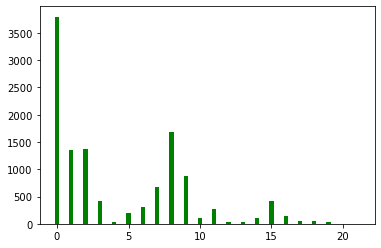

In [267]:
plt.bar(genres.values(), genre_count.values(), width=0.3, color='g') #refer genres dictionary for the keys 0

Next we need to find the average rating when a specific genre was present in a record(movie)

In [268]:
avg_rating_genre=genres.copy()

In [269]:
for x in avg_rating_genre:
    avg_rating_genre[x]=0

In [270]:
avg_rating_genre

{'Drama': 0,
 'Comedy': 0,
 'Romance': 0,
 'Musical': 0,
 'War': 0,
 'Horror': 0,
 'Mystery': 0,
 'Thriller': 0,
 'Action': 0,
 'Crime': 0,
 'History': 0,
 'Adventure': 0,
 'Sci-Fi': 0,
 'Sport': 0,
 'Biography': 0,
 'Family': 0,
 'Fantasy': 0,
 'Documentary': 0,
 'Music': 0,
 'Animation': 0,
 'News': 0,
 'Western': 0}

In [271]:
for ind in df.index:    
    genre=df['Genre'][ind]
    arr=genre.split(', ')
    for x in arr:
        avg_rating_genre[x]=avg_rating_genre[x]+df['Rating'][ind]

In [272]:
for x in genres:
    avg_rating_genre[x]=avg_rating_genre[x]/genre_count[x]

In [273]:
avg_rating_genre

{'Drama': 6.056743940990524,
 'Comedy': 5.751041666666666,
 'Romance': 5.811086956521741,
 'Musical': 6.246844660194175,
 'War': 5.981818181818182,
 'Horror': 4.8173267326732665,
 'Mystery': 5.867763157894743,
 'Thriller': 5.630044182621499,
 'Action': 5.520462633451965,
 'Crime': 5.820114285714279,
 'History': 6.905050505050506,
 'Adventure': 5.87942238267148,
 'Sci-Fi': 5.253125000000001,
 'Sport': 6.515000000000001,
 'Biography': 6.7373913043478275,
 'Family': 6.32331730769231,
 'Fantasy': 5.808219178082194,
 'Documentary': 7.608333333333334,
 'Music': 6.071698113207546,
 'Animation': 6.0725,
 'News': 8.0,
 'Western': 5.7}

Now,we replace our genres column with the average of the average ratings of the genres present in the movie

In [274]:
final_genres=[]

for genres in df['Genre']:
    arr=genres.split(', ')
    s=0
    for x in arr:
        s=s+avg_rating_genre[x]
    s=s/len(arr)
    final_genres.append(s)

In [275]:
final_genres

[6.056743940990524,
 5.7810643115942035,
 6.018210089283788,
 5.949883026443483,
 5.438378024396503,
 5.656873700595914,
 6.056743940990524,
 4.8173267326732665,
 5.419485957272169,
 5.872957521392976,
 5.903892803828595,
 5.872957521392976,
 5.914873794866516,
 5.223685457647383,
 5.284184199669966,
 5.580611277186178,
 6.056743940990524,
 6.056743940990524,
 5.5752534080367315,
 5.520462633451965,
 6.056743940990524,
 5.498725615696583,
 5.342544945284004,
 5.561719210061844,
 5.498725615696583,
 6.160752359830998,
 5.85300825208689,
 5.630044182621499,
 5.751041666666666,
 5.52150409107983,
 5.656873700595914,
 5.872957521392976,
 5.386793816725983,
 5.77264054207684,
 5.751041666666666,
 5.630044182621499,
 6.480897223020515,
 6.515000000000001,
 6.566395250129619,
 6.056743940990524,
 5.3142068445975035,
 5.7810643115942035,
 5.938429113352401,
 5.751041666666666,
 5.903892803828595,
 6.056743940990524,
 5.968083161831002,
 6.160752359830998,
 5.749616335727636,
 5.933915448756132

In [276]:
len(final_genres)

5659

In [277]:
directors

{'Gaurav Bakshi': 0,
 'Ovais Khan': 1,
 'Rahul Rawail': 2,
 'Shoojit Sircar': 3,
 'Allyson Patel': 4,
 'Biju Bhaskar Nair': 5,
 'Madhu Ambat': 6,
 'Arshad Siddiqui': 7,
 'Partho Ghosh': 8,
 'Rabi Kinagi': 9,
 'Umesh Shukla': 10,
 'Sharat Katariya': 11,
 'Pramod Chakravorty': 12,
 'Ram Gopal Varma': 13,
 'Seshu Kmr': 14,
 'Vikram K. Kumar': 15,
 'Aparna Sen': 16,
 'Vicky Ranawat': 17,
 'Mani Shankar': 18,
 'Mohibul Haque': 19,
 'Sridhar Reddy': 20,
 'Vikram Bhatt': 21,
 'Dharmendra Suresh Desai': 22,
 'Bhushan Patel': 23,
 'Vidhu Vinod Chopra': 24,
 'Amrit Sagar': 25,
 'Aziz Zee': 26,
 'Prashant Gore': 27,
 'Harish Sharma': 28,
 'Sunil Tiwari': 29,
 'Abhishek Varman': 30,
 'S. Shankar': 31,
 'Raj N. Sippy': 32,
 'Jaideep Chopra': 33,
 'Shivam Tiwari': 34,
 'Jayoo Patwardhan': 35,
 'Mitali Ghoshal': 36,
 'Guddu Dhanoa': 37,
 'Awtar Krishna Kaul': 38,
 'Vishal Mahadkar': 39,
 'Ajai Sinha': 40,
 'Nagesh Kukunoor': 41,
 'Ankush Bhatt': 42,
 'Rajkumar Hirani': 43,
 'Arjun Mukerjee': 44,
 'Di

In [278]:
temp_df['Genre']=final_genres

Similarly we find the average rating for each director and replace the director with his average rating

In [279]:
avg_rating_director=directors.copy()
for x in avg_rating_director:
    avg_rating_director[x]=0
    
avg_rating_director

for ind in df.index:    
    x=df['Director'][ind]
    avg_rating_director[x]=avg_rating_director[x]+df['Rating'][ind]

final_rating_director=[]




In [280]:
avg_rating_director

{'Gaurav Bakshi': 7.0,
 'Ovais Khan': 4.4,
 'Rahul Rawail': 79.7,
 'Shoojit Sircar': 44.3,
 'Allyson Patel': 5.6,
 'Biju Bhaskar Nair': 4.0,
 'Madhu Ambat': 6.2,
 'Arshad Siddiqui': 13.9,
 'Partho Ghosh': 68.7,
 'Rabi Kinagi': 5.7,
 'Umesh Shukla': 24.9,
 'Sharat Katariya': 20.6,
 'Pramod Chakravorty': 96.2,
 'Ram Gopal Varma': 184.70000000000002,
 'Seshu Kmr': 6.6,
 'Vikram K. Kumar': 7.3,
 'Aparna Sen': 40.9,
 'Vicky Ranawat': 21.6,
 'Mani Shankar': 28.5,
 'Mohibul Haque': 3.5,
 'Sridhar Reddy': 4.5,
 'Vikram Bhatt': 144.1,
 'Dharmendra Suresh Desai': 11.2,
 'Bhushan Patel': 15.100000000000001,
 'Vidhu Vinod Chopra': 45.599999999999994,
 'Amrit Sagar': 12.399999999999999,
 'Aziz Zee': 4.0,
 'Prashant Gore': 5.5,
 'Harish Sharma': 6.8,
 'Sunil Tiwari': 5.0,
 'Abhishek Varman': 10.5,
 'S. Shankar': 21.5,
 'Raj N. Sippy': 86.89999999999999,
 'Jaideep Chopra': 11.899999999999999,
 'Shivam Tiwari': 6.1,
 'Jayoo Patwardhan': 7.7,
 'Mitali Ghoshal': 6.1,
 'Guddu Dhanoa': 62.3,
 'Awtar Krish

In [281]:
director_count=directors.copy()
for x in director_count:
    director_count[x]=0
    
for direc in df['Director']:
    director_count[direc]=director_count[direc]+1
    
for x in avg_rating_director:
    avg_rating_director[x]=avg_rating_director[x]/director_count[x]

In [282]:
avg_rating_director

{'Gaurav Bakshi': 7.0,
 'Ovais Khan': 4.4,
 'Rahul Rawail': 5.3133333333333335,
 'Shoojit Sircar': 7.383333333333333,
 'Allyson Patel': 5.6,
 'Biju Bhaskar Nair': 4.0,
 'Madhu Ambat': 6.2,
 'Arshad Siddiqui': 6.95,
 'Partho Ghosh': 4.9071428571428575,
 'Rabi Kinagi': 5.7,
 'Umesh Shukla': 6.225,
 'Sharat Katariya': 6.866666666666667,
 'Pramod Chakravorty': 6.413333333333333,
 'Ram Gopal Varma': 5.596969696969698,
 'Seshu Kmr': 6.6,
 'Vikram K. Kumar': 7.3,
 'Aparna Sen': 6.816666666666666,
 'Vicky Ranawat': 5.4,
 'Mani Shankar': 5.7,
 'Mohibul Haque': 3.5,
 'Sridhar Reddy': 4.5,
 'Vikram Bhatt': 4.803333333333333,
 'Dharmendra Suresh Desai': 5.6,
 'Bhushan Patel': 3.7750000000000004,
 'Vidhu Vinod Chopra': 6.514285714285713,
 'Amrit Sagar': 6.199999999999999,
 'Aziz Zee': 4.0,
 'Prashant Gore': 5.5,
 'Harish Sharma': 6.8,
 'Sunil Tiwari': 5.0,
 'Abhishek Varman': 5.25,
 'S. Shankar': 7.166666666666667,
 'Raj N. Sippy': 5.1117647058823525,
 'Jaideep Chopra': 5.949999999999999,
 'Shivam 

In [283]:
final_directors=[]
for x in df['Director']:
    final_directors.append(avg_rating_director[x])
final_directors
temp_df['Director']=final_directors

In [284]:
actors

{'Rasika Dugal': 0,
 'Prateik': 1,
 'Bobby Deol': 2,
 'Jimmy Sheirgill': 3,
 'Yash Dave': 4,
 'Augustine': 5,
 'Rati Agnihotri': 6,
 'Pankaj Berry': 7,
 'Jackie Shroff': 8,
 'Jeet': 9,
 'Amitabh Bachchan': 10,
 'Neil Bhoopalam': 11,
 'Guru Dutt': 12,
 'Mithun Chakraborty': 13,
 'Mast Ali': 14,
 'Madhavan': 15,
 'Shabana Azmi': 16,
 'Ronit Roy': 17,
 'Milind Soman': 18,
 'Rehal Khan': 19,
 'Tarun Arora': 20,
 'Rajniesh Duggall': 21,
 'Sharman Joshi': 22,
 'Vicky Ahuja': 23,
 'Zareen Khan': 24,
 'Anil Kapoor': 25,
 'Manoj Bajpayee': 26,
 'Abuzar Akhtar': 27,
 'Amitkumar Sharma': 28,
 'Hemant Pandey': 29,
 'Ashutosh Rana': 30,
 'Arjun Kapoor': 31,
 'Rajinikanth': 32,
 'Divyendu Sharma': 33,
 'Rahul Dev': 34,
 'Nachiket Patwardhan': 35,
 'Barun Sobti': 36,
 'Sudhir Dalvi': 37,
 'Salil Acharya': 38,
 'Naseeruddin Shah': 39,
 'Karan Singh Grover': 40,
 'Aamir Khan': 41,
 'Aisha Ahmed': 42,
 'Seema Azmi': 43,
 'Soha Ali Khan': 44,
 'Mastan Alibhai Burmawalla': 45,
 'Jennifer Kendal': 46,
 'Ro

In [285]:
avg_rating_actors=actors.copy()

We repeat the same thing for Actor 1,Actor 2,Actor 3.

In [286]:
avg_rating_actors
for x in avg_rating_actors:
    avg_rating_actors[x]=0
avg_rating_actors

freq_actors=actors.copy()

for x in freq_actors:
    freq_actors[x]=0
    
labels=['Actor 1','Actor 2','Actor 3']
for label in labels:
    for x in df[label]:
        freq_actors[x]=freq_actors[x]+1


for label in labels:
    for ind in df.index:
        actor=df[label][ind]
        avg_rating_actors[actor]=avg_rating_actors[actor]+df['Rating'][ind]
for x in avg_rating_actors:
    avg_rating_actors[x]=avg_rating_actors[x]/freq_actors[x]



In [287]:
avg_rating_actors

{'Rasika Dugal': 6.5666666666666655,
 'Prateik': 5.666666666666667,
 'Bobby Deol': 4.8567567567567576,
 'Jimmy Sheirgill': 5.723809523809524,
 'Yash Dave': 5.6,
 'Augustine': 4.0,
 'Rati Agnihotri': 5.361290322580645,
 'Pankaj Berry': 5.122222222222223,
 'Jackie Shroff': 5.205952380952381,
 'Jeet': 6.300000000000001,
 'Amitabh Bachchan': 6.3006756756756745,
 'Neil Bhoopalam': 6.525,
 'Guru Dutt': 7.400000000000001,
 'Mithun Chakraborty': 5.454999999999999,
 'Mast Ali': 6.949999999999999,
 'Madhavan': 6.546153846153846,
 'Shabana Azmi': 6.6291139240506345,
 'Ronit Roy': 6.055555555555555,
 'Milind Soman': 6.380000000000001,
 'Rehal Khan': 3.5,
 'Tarun Arora': 4.840000000000001,
 'Rajniesh Duggall': 4.8,
 'Sharman Joshi': 4.906250000000001,
 'Vicky Ahuja': 4.5,
 'Zareen Khan': 5.283333333333333,
 'Anil Kapoor': 5.52142857142857,
 'Manoj Bajpayee': 6.346808510638297,
 'Abuzar Akhtar': 4.0,
 'Amitkumar Sharma': 5.5,
 'Hemant Pandey': 6.8,
 'Ashutosh Rana': 5.540909090909091,
 'Arjun Kapoor

In [288]:
final_actor1=[]
final_actor2=[]
final_actor3=[]

for x in df['Actor 1']:
    final_actor1.append(avg_rating_actors[x])
for x in df['Actor 2']:
    final_actor2.append(avg_rating_actors[x])
for x in df['Actor 3']:
    final_actor3.append(avg_rating_actors[x])
final_actor1

[6.5666666666666655,
 5.666666666666667,
 4.8567567567567576,
 5.723809523809524,
 5.6,
 4.0,
 5.361290322580645,
 5.122222222222223,
 5.205952380952381,
 6.300000000000001,
 6.3006756756756745,
 6.525,
 7.400000000000001,
 5.454999999999999,
 6.949999999999999,
 6.546153846153846,
 6.6291139240506345,
 6.055555555555555,
 6.380000000000001,
 3.5,
 4.840000000000001,
 4.8,
 4.906250000000001,
 4.5,
 5.283333333333333,
 5.52142857142857,
 6.346808510638297,
 4.0,
 5.5,
 6.8,
 5.540909090909091,
 5.053846153846154,
 5.954761904761906,
 5.205952380952381,
 6.362500000000001,
 5.273333333333332,
 7.7,
 6.55,
 4.8567567567567576,
 5.6625,
 5.0,
 4.906250000000001,
 6.394252873563221,
 5.033333333333334,
 6.816666666666665,
 6.9,
 5.366666666666667,
 6.05,
 5.777777777777779,
 7.5,
 5.7,
 5.729411764705882,
 5.776470588235293,
 4.15,
 5.55,
 7.3,
 4.8,
 7.8,
 5.050000000000001,
 6.5,
 6.133333333333333,
 4.85,
 6.2,
 5.76181818181818,
 5.887500000000001,
 5.725,
 7.050000000000001,
 5.290476

In [289]:
actors

{'Rasika Dugal': 0,
 'Prateik': 1,
 'Bobby Deol': 2,
 'Jimmy Sheirgill': 3,
 'Yash Dave': 4,
 'Augustine': 5,
 'Rati Agnihotri': 6,
 'Pankaj Berry': 7,
 'Jackie Shroff': 8,
 'Jeet': 9,
 'Amitabh Bachchan': 10,
 'Neil Bhoopalam': 11,
 'Guru Dutt': 12,
 'Mithun Chakraborty': 13,
 'Mast Ali': 14,
 'Madhavan': 15,
 'Shabana Azmi': 16,
 'Ronit Roy': 17,
 'Milind Soman': 18,
 'Rehal Khan': 19,
 'Tarun Arora': 20,
 'Rajniesh Duggall': 21,
 'Sharman Joshi': 22,
 'Vicky Ahuja': 23,
 'Zareen Khan': 24,
 'Anil Kapoor': 25,
 'Manoj Bajpayee': 26,
 'Abuzar Akhtar': 27,
 'Amitkumar Sharma': 28,
 'Hemant Pandey': 29,
 'Ashutosh Rana': 30,
 'Arjun Kapoor': 31,
 'Rajinikanth': 32,
 'Divyendu Sharma': 33,
 'Rahul Dev': 34,
 'Nachiket Patwardhan': 35,
 'Barun Sobti': 36,
 'Sudhir Dalvi': 37,
 'Salil Acharya': 38,
 'Naseeruddin Shah': 39,
 'Karan Singh Grover': 40,
 'Aamir Khan': 41,
 'Aisha Ahmed': 42,
 'Seema Azmi': 43,
 'Soha Ali Khan': 44,
 'Mastan Alibhai Burmawalla': 45,
 'Jennifer Kendal': 46,
 'Ro

In [290]:
freq_actors

{'Rasika Dugal': 6,
 'Prateik': 6,
 'Bobby Deol': 37,
 'Jimmy Sheirgill': 42,
 'Yash Dave': 1,
 'Augustine': 1,
 'Rati Agnihotri': 31,
 'Pankaj Berry': 9,
 'Jackie Shroff': 84,
 'Jeet': 2,
 'Amitabh Bachchan': 148,
 'Neil Bhoopalam': 4,
 'Guru Dutt': 10,
 'Mithun Chakraborty': 160,
 'Mast Ali': 2,
 'Madhavan': 13,
 'Shabana Azmi': 79,
 'Ronit Roy': 9,
 'Milind Soman': 5,
 'Rehal Khan': 1,
 'Tarun Arora': 5,
 'Rajniesh Duggall': 12,
 'Sharman Joshi': 16,
 'Vicky Ahuja': 4,
 'Zareen Khan': 6,
 'Anil Kapoor': 84,
 'Manoj Bajpayee': 47,
 'Abuzar Akhtar': 1,
 'Amitkumar Sharma': 1,
 'Hemant Pandey': 1,
 'Ashutosh Rana': 22,
 'Arjun Kapoor': 13,
 'Rajinikanth': 42,
 'Divyendu Sharma': 8,
 'Rahul Dev': 15,
 'Nachiket Patwardhan': 1,
 'Barun Sobti': 4,
 'Sudhir Dalvi': 8,
 'Salil Acharya': 1,
 'Naseeruddin Shah': 87,
 'Karan Singh Grover': 3,
 'Aamir Khan': 42,
 'Aisha Ahmed': 1,
 'Seema Azmi': 3,
 'Soha Ali Khan': 10,
 'Mastan Alibhai Burmawalla': 18,
 'Jennifer Kendal': 1,
 'Robin Sikarwar':

In [291]:
temp_df

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,6.056744,7.0,7.000000,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,1,2019,110,5.781064,4.4,4.400000,Prateik,Ishita Raj,Siddhant Kapoor
5,2,1997,147,6.018210,4.7,5.313333,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,3,2005,142,5.949883,7.4,7.383333,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,4,2012,82,5.438378,5.6,5.600000,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,5654,2015,115,6.056744,6.1,6.100000,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,5655,2001,153,6.566395,6.2,7.250000,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,5656,1989,125,5.799107,5.8,6.270000,Chiranjeevi,Jayamalini,Rajinikanth
15505,5657,1999,129,5.788603,4.5,5.225000,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [292]:
# for label in labels:
#     for ind in temp_df.index:    
#         temp_df[label][ind]=freq_actors[temp_df[label][ind]]

In [293]:
temp_df.head()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,6.056744,7.0,7.000000,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,1,2019,110,5.781064,4.4,4.400000,Prateik,Ishita Raj,Siddhant Kapoor
5,2,1997,147,6.018210,4.7,5.313333,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,3,2005,142,5.949883,7.4,7.383333,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,4,2012,82,5.438378,5.6,5.600000,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [294]:
df.head()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [295]:
temp_df.head()

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,6.056744,7.0,7.000000,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,1,2019,110,5.781064,4.4,4.400000,Prateik,Ishita Raj,Siddhant Kapoor
5,2,1997,147,6.018210,4.7,5.313333,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,3,2005,142,5.949883,7.4,7.383333,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,4,2012,82,5.438378,5.6,5.600000,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [296]:
temp_df
# total_actor_freq=temp_df['Actor 1']+temp_df['Actor 2']+temp_df['Actor 3']
# temp_df=temp_df.drop(['Actor 1','Actor 2','Actor 3'], axis=1)
temp_df['Actor 1']=final_actor1
temp_df['Actor 2']=final_actor2
temp_df['Actor 3']=final_actor3
temp_df

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,0,2019,109,6.056744,7.0,7.000000,6.566667,7.000000,7.000000
3,1,2019,110,5.781064,4.4,4.400000,5.666667,4.400000,4.450000
5,2,1997,147,6.018210,4.7,5.313333,4.856757,5.948148,6.646296
6,3,2005,142,5.949883,7.4,7.383333,5.723810,5.566667,6.516667
8,4,2012,82,5.438378,5.6,5.600000,5.600000,5.729412,5.600000
...,...,...,...,...,...,...,...,...,...
15493,5654,2015,115,6.056744,6.1,6.100000,7.150000,6.000000,5.850000
15494,5655,2001,153,6.566395,6.2,7.250000,4.566000,5.821739,6.346809
15503,5656,1989,125,5.799107,5.8,6.270000,6.333333,6.233333,5.954762
15505,5657,1999,129,5.788603,4.5,5.225000,5.519167,4.925000,5.800000


Now we have our data ready for training.We create first segregate the X and Y values.We also need to scale(mean normalization) the values of X so that our model fares off better in prediction.

In [297]:
X = temp_df[[ 'Year', 'Duration', 'Genre', 'Director','Actor 1','Actor 2','Actor 3' ]]
Y = temp_df['Rating']
X.head(10)

X = preprocessing.scale(X)

In [298]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
# print the data
x_train

array([[ 1.00062486,  0.97010689,  0.90231736, ...,  0.47666507,
         0.06637554,  0.52710735],
       [ 0.74733327,  0.06165159,  0.59700047, ...,  1.65823839,
         1.67022708,  1.62096023],
       [ 0.89930823, -1.32078039,  0.64592557, ...,  1.34273975,
         0.75040482,  0.905695  ],
       ...,
       [ 0.64601664, -1.79475707, -1.43731525, ...,  0.60657628,
        -0.71832509, -0.07220668],
       [ 0.44338337, -0.45182315,  0.19422347, ..., -0.74556072,
        -1.81786292, -0.51286115],
       [ 1.00062486,  0.81211466,  0.57646041, ..., -0.79563987,
         1.61855167,  1.52037606]])

## Linear Regression

In [299]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [300]:
linreg.fit(x_train,y_train)

LinearRegression()

In [301]:
print(linreg.coef_)

[0.01768889 0.06434244 0.01894734 0.62442099 0.21083072 0.22624918
 0.28721651]


In [302]:
print(linreg.intercept_)

5.900891520129563


In [303]:
y_pred=linreg.predict(x_test)

In [305]:
from sklearn import metrics
from sklearn.metrics import r2_score
#MAE
lr=[]
x=metrics.mean_absolute_error(y_pred,y_test)
lr.append(x)
print(x)

#MSE
x=metrics.mean_squared_error(y_pred,y_test)
lr.append(x)
print(x)

#RMSE
x=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
lr.append(x)
print(x)

#R_squared error
x=r2_score(y_test,y_pred)
lr.append(x)
print(x)

0.524614854816667
0.5078629838951113
0.7126450616506869
0.7391823509092201


## Decision Tree

In [306]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(
                                  random_state = 0,
                                 min_samples_split=1,
                                 splitter='best',
                                 ) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
dt=[]
x=metrics.mean_absolute_error(y_pred,y_test)
dt.append(x)
print(x)

#MSE
x=metrics.mean_squared_error(y_pred,y_test)
dt.append(x)
print(x)

#RMSE
x=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
dt.append(x)
print(x)

#R_squared error
x=r2_score(y_test,y_pred)
dt.append(x)
print(x)

0.6362190812720848
0.8625795053003533
0.9287515842787851
0.5570144588982484


## Random Forest

In [307]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

rf=[]
x=metrics.mean_absolute_error(y_pred,y_test)
rf.append(x)
print(x)

#MSE
x=metrics.mean_squared_error(y_pred,y_test)
rf.append(x)
print(x)

#RMSE
x=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
rf.append(x)
print(x)

#R_squared error
x=r2_score(y_test,y_pred)
rf.append(x)
print(x)

0.6391833585554456
0.7573739790208576
0.8702723591042391
0.6110437126649364


# Gradient Boosting

In [308]:
from sklearn.ensemble import  GradientBoostingRegressor

regr =  GradientBoostingRegressor(loss='squared_error',
                                  learning_rate=0.1)
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

gb=[]
x=metrics.mean_absolute_error(y_pred,y_test)
gb.append(x)
print(x)

#MSE
x=metrics.mean_squared_error(y_pred,y_test)
gb.append(x)
print(x)

#RMSE
x=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
gb.append(x)
print(x)

#R_squared error
x=r2_score(y_test,y_pred)
gb.append(x)
print(x)

0.49729375431127953
0.47398921736817806
0.6884687482872248
0.756578531437371


# KNN

In [309]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=10,
                           )
neigh.fit(x_train, y_train)

neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test)

knn=[]
x=metrics.mean_absolute_error(y_pred,y_test)
knn.append(x)
print(x)

#MSE
x=metrics.mean_squared_error(y_pred,y_test)
knn.append(x)
print(x)

#RMSE
x=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
knn.append(x)
print(x)

#R_squared error
x=r2_score(y_test,y_pred)
knn.append(x)
print(x)

0.5245671378091873
0.5143610424028269
0.7171896836979927
0.7358452139305843


Comparing the Errors

In [310]:
model_labels=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','KNN']
type_of_error=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R-Squared Value']

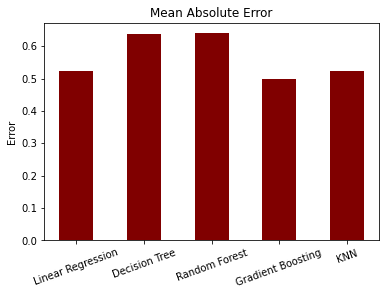

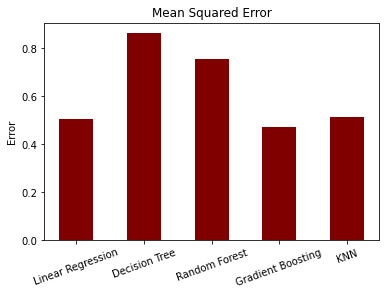

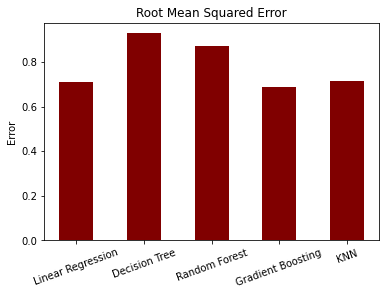

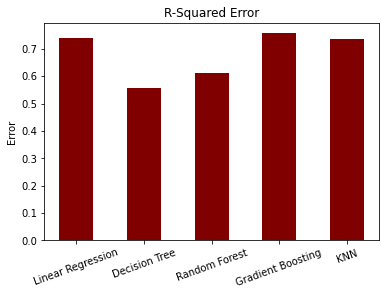

In [329]:
for i in range(4):
    fig=plt.bar(model_labels,[lr[i],dt[i],rf[i],gb[i],knn[i]],color = 'maroon',
        width = 0.5)
    plt.xticks(rotation=20)
    plt.ylabel("Error")
    plt.title(type_of_error[i])
    plt.show()

From the above analysis,Gradient Boosting is the best algorithm for the above Task

array([ 1.15259982, -0.53081926, -0.04347028, -0.3564037 , -0.12340095,
       -0.37464261,  0.85127265])